In [1]:
from LIM_lightcone import paint_lightcone,make_survey
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.constants as cu


%matplotlib inline

In [8]:
test = make_survey(dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM',
                            lines=dict(CO=True),
                            models=dict(CO=dict(model_name='CO_Li16',model_pars={'alpha':1.37,'beta':-1.74,'delta_mf':1,'sigma_LCO':0.3})),
                           do_external_SFR = False, external_SFR = '',zmin = 2.6,zmax = 3.,
                 output_root = "output/default"))


/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_173.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_179.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_170.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_172.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_168.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_178.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_160.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_161.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_171.fits


/home/jlbernal/preLIMinary/source/line_models.py:28: RuntimeWarning: divide by zero encountered in log10
  log10_LCO = (np.log10(LIR) - beta)/alpha


In [17]:
observed_catalog = dict(RA= np.array([]),DEC=np.array([]),Zobs=np.array([]),signal=np.array([]))

for line in self.lines.keys():
    if self.lines[line]:
        inds = np.where(np.logical_and(self.nuObs_line_halo[line] >= self.nuObs_min,
                                       self.nuObs_line_halo[line] <= self.nuObs_max))[0]
        observed_catalog['RA'] = np.append(observed_catalog['RA'],self.halo_catalog['RA'][inds])
        observed_catalog['DEC'] = np.append(observed_catalog['DEC'],self.halo_catalog['DEC'][inds])
        observed_catalog['Zobs'] = np.append(observed_catalog['Zobs'],self.line_nu0[self.target_line]/self.nuObs_line_halo[line][inds]-1)
        

In [15]:
test.line_nu0[test.target_line]/test.nuObs_line_halo['CO']-1

<Quantity [2.6655135, 2.6639771, 2.6660025, ..., 2.9495609, 2.9483283,
           2.9558315]>

In [12]:
nuObs_line_halo = {}
for line in test.lines.keys():
    if test.lines[line]:
        nuObs_line_halo[line] = test.line_nu0[line]/(1+test.halo_catalog['Z'])

In [11]:
test.line_nu0['CO']/(1+test.halo_catalog['Z'])

<Quantity [35.60152 , 35.602066, 35.600456, ..., 35.004852, 35.0246  ,
           34.98268 ] GHz>

In [9]:
test = paint_lightcone(dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM',
                            lines=dict(CO=True),
                            models=dict(CO=dict(model_name='CO_Li16',model_pars={'alpha':1.37,'beta':-1.74,'delta_mf':1,'sigma_LCO':0.3})),
                           do_external_SFR = False, external_SFR = '',zmin = 2.2,zmax = 2.3,
                 output_root = "output/default"))

In [10]:
test.read_halo_catalog

/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_173.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_179.fits


/home/jlbernal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


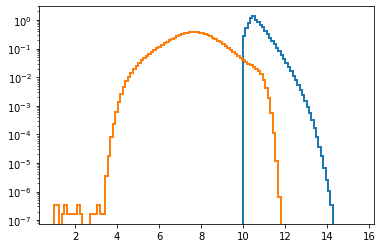

In [17]:
hmcat = np.log10(test.halo_catalog['M_HALO'])
smcat = np.log10(test.halo_catalog['SM_HALO'])

bins_hm = np.linspace(10, 15.5, 50)
bins_sm = np.linspace(1, 13, 100)
plt.hist(hmcat, bins=bins_hm, histtype='step', density=True, lw=2)
plt.hist(smcat, bins=bins_sm, histtype='step', density=True, lw=2)
plt.yscale('log')
plt.show()

In [12]:
from glob import glob
import numpy as np

In [13]:
fnames = glob(test.halo_lightcone_dir+'/*')

In [16]:
int(fnames[0].split('_')[-1].split('.')[0])

0

In [33]:
ind = np.zeros(len(fnames)).astype(int)
for ifile in range(len(fnames)):
    ind[ifile] =  int(fnames[ifile].split('_')[-1].split('.')[0])
    
sort_ind = np.argsort(ind)

In [46]:
for ifile in range(len(inds[0])):
    print(fnames[sort_ind[inds[0][ifile]]])

/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_23.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_24.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_25.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_26.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_27.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_28.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_29.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_30.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_31.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_32.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_33.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_34.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_35.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_36.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_37.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_38.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_39.fits
/home/jlbernal

In [34]:
sort_ind

array([  0, 257, 256, 255, 254, 253, 252, 250, 249, 248, 246, 245, 244,
       243, 239, 240, 238, 237, 236, 233, 234, 232, 230, 229, 227, 226,
       225, 224, 221, 222, 219, 217, 216, 214, 213, 211, 212, 208, 205,
       207, 206, 201, 202, 200, 199, 197, 195, 196, 192, 190, 191, 189,
       188, 186, 184, 183, 182, 180, 178, 179, 177, 174, 173, 172, 169,
       168, 166, 167, 164, 163, 162, 157, 158, 159, 156, 155, 152, 151,
       149, 150, 147, 148, 144, 143, 141, 139, 137, 138, 136, 133, 132,
       130, 128, 129, 127, 126, 123, 122, 121, 119, 117, 116, 115, 114,
       111, 109, 110, 108, 107, 104, 102, 103, 101,  99,  97,  96,  94,
        92,  90,  86,  91,  87,  85,  81,  82,  80,  78,  75,  77,  74,
        73,  69,  66,  70,  67,  64,  63,  58,  61,  57,  53,  54,  49,
        42,  45,  50,  51,  40,  41,  48,  44,  35,  33,  34,  32,  25,
        21,  27,  11,  19,   7,   8,  20,  16,  26,  24,  14,  17,   5,
        12,   3,   9,   4,   1,  13,  10,  18,  15,   6,   2,  3

In [14]:
Nfiles = len(fnames)

In [2]:
camb_pars = camb.set_params(H0=68.0, omch2 = 0.1188368, ombh2 = 0.02312)


In [4]:
cosmo = camb.get_background(camb_pars)

In [8]:
cosmo.comoving_radial_distance(np.linspace(0.,1.,5))

array([   0.        , 1036.17887083, 1938.46670949, 2715.55870666,
       3383.9439655 ])

In [35]:
 dists = (np.arange(Nfiles+1))*25*a.Mpch.value

In [37]:
mi = cosmo.comoving_radial_distance(0.2)
ma = cosmo.comoving_radial_distance(0.6)
inds = np.where(np.logical_and(dists[:-1] >= mi, dists[1:] <= ma))

In [41]:
fnames[sort_ind[inds[0]]]

TypeError: only integer scalar arrays can be converted to a scalar index

In [43]:
sort_ind[inds[0]]

array([229, 227, 226, 225, 224, 221, 222, 219, 217, 216, 214, 213, 211,
       212, 208, 205, 207, 206, 201, 202, 200, 199, 197, 195, 196, 192,
       190, 191, 189, 188, 186, 184, 183, 182, 180, 178, 179])

In [7]:
from lim import lim

In [8]:
a = lim()

In [9]:
(30 * a.Msunh).value#.to(a.Msunh).to(u.Msun)

44.53681710213777

In [22]:
import astropy.units as u

In [10]:
a.zcosmo

array([ 0.        ,  0.10067114,  0.20134228,  0.30201342,  0.40268456,
        0.5033557 ,  0.60402685,  0.70469799,  0.80536913,  0.90604027,
        1.00671141,  1.10738255,  1.20805369,  1.30872483,  1.40939597,
        1.51006711,  1.61073826,  1.7114094 ,  1.81208054,  1.91275168,
        2.01342282,  2.11409396,  2.2147651 ,  2.31543624,  2.41610738,
        2.51677852,  2.61744966,  2.71812081,  2.81879195,  2.91946309,
        3.02013423,  3.12080537,  3.22147651,  3.32214765,  3.42281879,
        3.52348993,  3.62416107,  3.72483221,  3.82550336,  3.9261745 ,
        4.02684564,  4.12751678,  4.22818792,  4.32885906,  4.4295302 ,
        4.53020134,  4.63087248,  4.73154362,  4.83221477,  4.93288591,
        5.03355705,  5.13422819,  5.23489933,  5.33557047,  5.43624161,
        5.53691275,  5.63758389,  5.73825503,  5.83892617,  5.93959732,
        6.04026846,  6.1409396 ,  6.24161074,  6.34228188,  6.44295302,
        6.54362416,  6.6442953 ,  6.74496644,  6.84563758,  6.94

In [14]:
a._default_obs_params

{'Tsys_NEFD': <Quantity 40. K>,
 'Nfeeds': 19,
 'beam_FWHM': <Quantity 4.1 arcmin>,
 'Delta_nu': <Quantity 8. GHz>,
 'dnu': <Quantity 15.6 MHz>,
 'tobs': <Quantity 6000. h>,
 'Omega_field': <Quantity 2.25 deg2>,
 'Nfield': 1,
 'N_FG_par': 1,
 'N_FG_perp': 1,
 'do_FG_wedge': False,
 'a_FG': <Quantity 0. 1 / Mpc>,
 'b_FG': 0.0}

In [11]:
test.line_nu0

AttributeError: 'Survey' object has no attribute 'line_nu0'